In [107]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm#_notebook as tqdm
from pyzbar import pyzbar
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

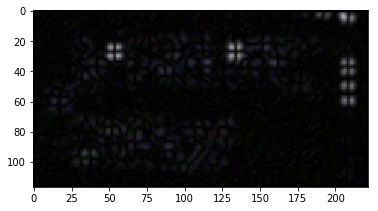

In [108]:
def sobel(img, dx, dy, ksize):
    sobelx64f = cv2.Sobel(img,cv2.CV_64F,dx,dy,ksize=ksize)
    abs_sobel64f = np.absolute(sobelx64f)
    return np.uint8(abs_sobel64f)#cv2.GaussianBlur(img, (11,11), 3)
plt.imshow(sobel(cv2.GaussianBlur(label, (41,41), 2), 1, 1, 5))

In [109]:
folderGlob = '/home/rob/HWR/datasets/Aarhus/*label*.jpg'
label_fps = glob(folderGlob)

In [112]:
debug = False
#Grayscale image,
#then make a threshold which is the mean of the grayscale image,
#run a kernel over the image, similar to erosion. if there are pixels <
# the threshold, replace them with random pixels from within the kernel
# if they are all <, replace them with a random pixel from the image
#take all the pixels that are below the threshold and replace them with random pixels from ones below the threshold
#repeat once, 
for fp in tqdm(sorted(label_fps)):
    new_fp = fp.replace('label','blank')
    if os.path.exists(new_fp):
        continue 
    
    if debug ==True:
    #    fp = '/home/rob/HWR/datasets/zooniverse/219403/Label0020.jpg'
        fps = np.random.permutation(label_fps)
        fp = fps[0]
    try:
        label = cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB)
    except:
        print('Couldnt open file: %s'%fp)
        os.remove(fp)
        continue
        

    if debug == True:
        plt.figure()
        plt.imshow(label)
    gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)

    #kmeans = KMeans(n_clusters = 2)
    #kmeans.fit(gray.flatten().reshape((-1,1)))
    th = gray.mean()#np.mean(kmeans.cluster_centers_)#gray.mean()
    _sobel = sobel(label,1,1,3)

    mask = (gray>th)
    background = label[mask]
    new = label.copy()
    kernel_size = 5
    for row in range(new.shape[0]//kernel_size + int(new.shape[0]%kernel_size > 0)):
        si = row*kernel_size
        ei = (row+1)*kernel_size
        ei = min(ei, new.shape[0])
        for col in range(new.shape[1]//kernel_size + int(new.shape[0]%kernel_size > 0)):
            sj = col*kernel_size
            ej = (col+1)*kernel_size
            ej = min(ej, new.shape[1])
            squ = new[si:ei,sj:ej]
            gray_squ = gray[si:ei,sj:ej]
            mask_squ = mask[si:ei,sj:ej]
            background_squ = squ[mask_squ]
            _sobel_squ = _sobel[si:ei,sj:ej]
            if _sobel_squ.mean() >= 5:
                if len(background_squ):
                    for i in range(squ.shape[0]):
                        for j in range(squ.shape[1]):
                            if gray_squ[i,j] < th:
                                new[si+i,sj+j] = background_squ[np.random.randint(len(background_squ))]
                else:
                    for i in range(squ.shape[0]):
                        for j in range(squ.shape[1]):
                            if gray_squ[i,j] < th:
                                new[si+i,sj+j] = background[np.random.randint(len(background))]

    if debug == True:
        plt.figure()
        plt.imshow(new)

    label = new.copy()
    gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)

    if gray.mean() < 150:

        #kmeans = KMeans(n_clusters = 2)
        #kmeans.fit(gray.flatten().reshape((-1,1)))
        th = gray.mean()#np.mean(kmeans.cluster_centers_)#gray.mean()

        mask = (gray>th)
        background = label[mask]
        new = label.copy()
        kernel_size = 17
        for row in range(new.shape[0]//kernel_size + int(new.shape[0]%kernel_size > 0)):
            si = row*kernel_size
            ei = (row+1)*kernel_size
            ei = min(ei, new.shape[0])
            for col in range(new.shape[1]//kernel_size + int(new.shape[0]%kernel_size > 0)):
                sj = col*kernel_size
                ej = (col+1)*kernel_size
                ej = min(ej, new.shape[1])
                squ = new[si:ei,sj:ej]
                gray_squ = gray[si:ei,sj:ej]
                mask_squ = mask[si:ei,sj:ej]
                background_squ = squ[mask_squ]
                if len(background_squ):
                    for i in range(squ.shape[0]):
                        for j in range(squ.shape[1]):
                            if gray_squ[i,j] < th:
                                new[si+i,sj+j] = background_squ[np.random.randint(len(background_squ))]
                else:
                    for i in range(squ.shape[0]):
                        for j in range(squ.shape[1]):
                            if gray_squ[i,j] < th:
                                new[si+i,sj+j] = background[np.random.randint(len(background))]

        if debug == True:
            plt.figure()
            plt.imshow(new)
            
    if debug == True:
        break
    
    new_fp = fp.replace('label','blank')
    cv2.imwrite(new_fp, cv2.cvtColor(new, cv2.COLOR_RGB2BGR))

100%|██████████| 1344/1344 [04:59<00:00,  4.26it/s]


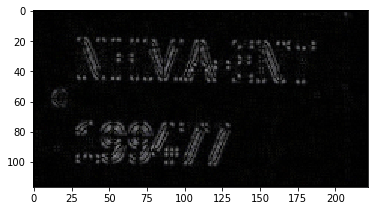

In [111]:
plt.imshow(_sobel)

1

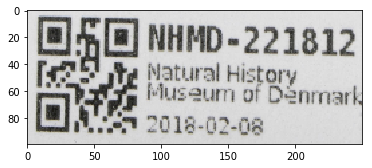

In [35]:
fp = label_fps[0]
img = cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(250,100))
plt.imshow(img)
len(pyzbar.decode(img))

100%|██████████| 10/10 [00:02<00:00,  3.58it/s]
/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 13/13 [00:06<00:00,  2.44it/s]
/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/matplotlib/pyplot

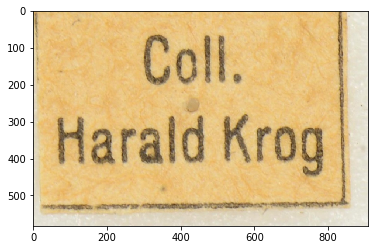

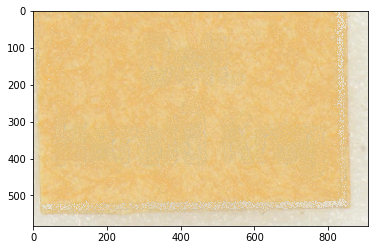

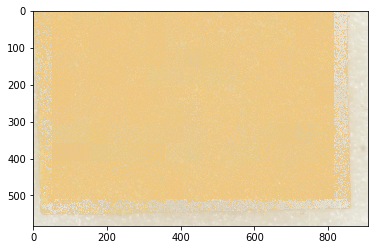

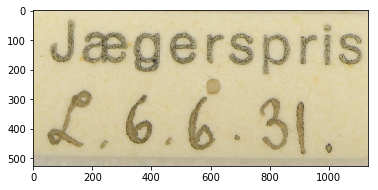

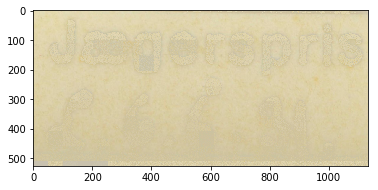

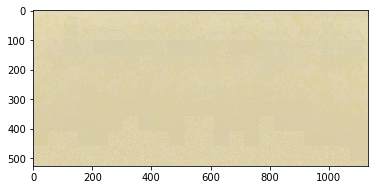

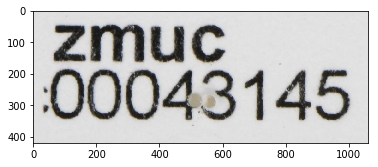

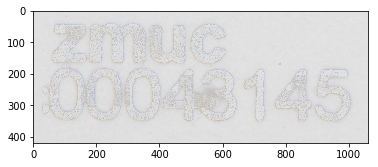

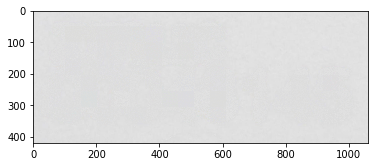

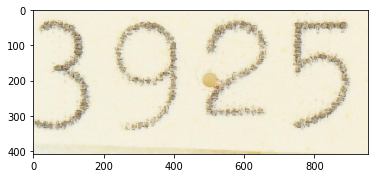

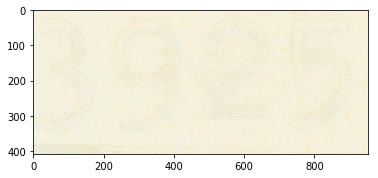

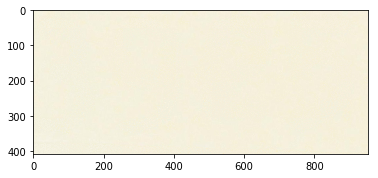

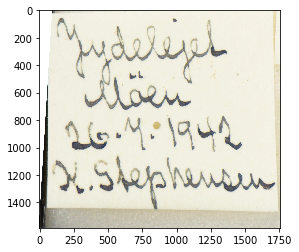

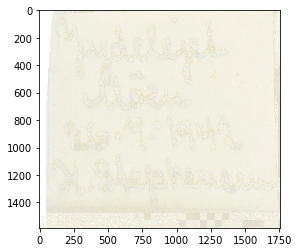

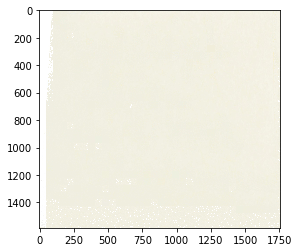

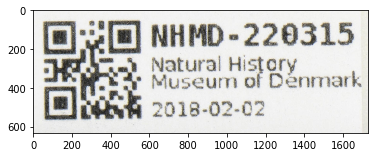

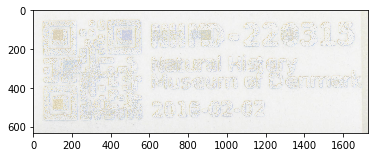

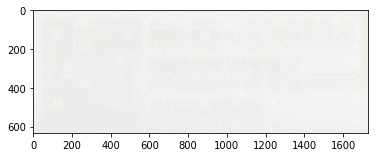

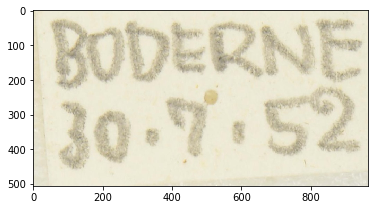

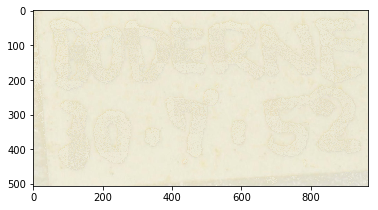

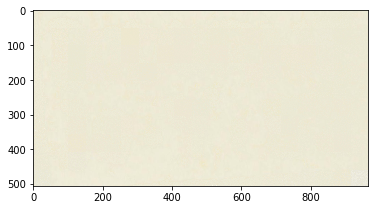

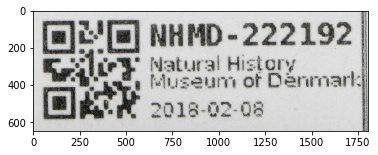

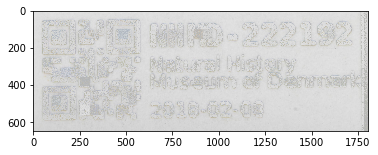

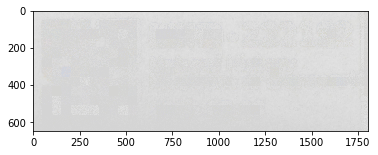

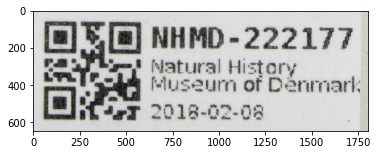

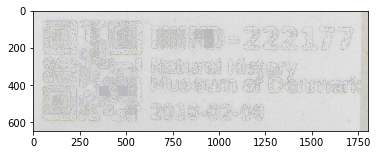

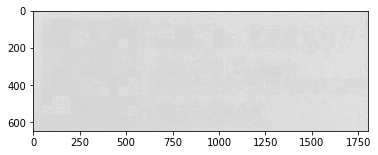

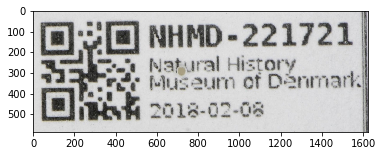

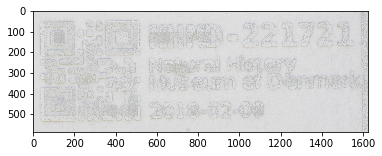

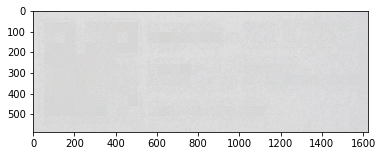

In [7]:
#Grayscale image,
#then make a threshold which is the mean of the grayscale image,
#run a kernel over the image, similar to erosion. if there are pixels <
# the threshold, replace them with random pixels from within the kernel
# if they are all <, replace them with a random pixel from the image
#take all the pixels that are below the threshold and replace them with random pixels from ones below the threshold
#repeat once, 
for i in range(10):
    fps = np.random.permutation(label_fps)
    fp = fps[0]
    label = cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(label)
    gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)

    kmeans = KMeans(n_clusters = 2)
    kmeans.fit(gray.flatten().reshape((-1,1)))
    th = gray.mean()#np.mean(kmeans.cluster_centers_)#gray.mean()
    #_sobel = sobel(cv2.GaussianBlur(label, (41,41), 2), 1, 1, 5)

    mask = (gray>th)
    background = label[mask]
    new = label.copy()
    kernel_size = 51
    for row in tqdm(range(new.shape[0]//kernel_size + int(new.shape[0]%kernel_size > 0))):
        si = row*kernel_size
        ei = (row+1)*kernel_size
        ei = min(ei, new.shape[0])
        for col in range(new.shape[1]//kernel_size + int(new.shape[0]%kernel_size > 0)):
            sj = col*kernel_size
            ej = (col+1)*kernel_size
            ej = min(ej, new.shape[1])
            squ = new[si:ei,sj:ej]
            gray_squ = gray[si:ei,sj:ej]
            mask_squ = mask[si:ei,sj:ej]
            background_squ = squ[mask_squ]
            #_sobel_squ = _sobel[si:ei,sj:ej]
            #if _sobel_squ.mean() >= 10:
            if len(background_squ):
                for i in range(squ.shape[0]):
                    for j in range(squ.shape[1]):
                        if gray_squ[i,j] < th:
                            new[si+i,sj+j] = background_squ[np.random.randint(len(background_squ))]
            else:
                for i in range(squ.shape[0]):
                    for j in range(squ.shape[1]):
                        if gray_squ[i,j] < th:
                            new[si+i,sj+j] = background[np.random.randint(len(background))]

    plt.figure()
    plt.imshow(new)

    label = new.copy()
    plt.imshow(label)
    gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)

    #kmeans = KMeans(n_clusters = 2)
    #kmeans.fit(gray.flatten().reshape((-1,1)))
    th = gray.mean()#np.mean(kmeans.cluster_centers_)#gray.mean()

    mask = (gray>th)
    background = label[mask]
    new = label.copy()
    kernel_size = 51
    for row in tqdm(range(new.shape[0]//kernel_size + int(new.shape[0]%kernel_size > 0))):
        si = row*kernel_size
        ei = (row+1)*kernel_size
        ei = min(ei, new.shape[0])
        for col in range(new.shape[1]//kernel_size + int(new.shape[0]%kernel_size > 0)):
            sj = col*kernel_size
            ej = (col+1)*kernel_size
            ej = min(ej, new.shape[1])
            squ = new[si:ei,sj:ej]
            gray_squ = gray[si:ei,sj:ej]
            mask_squ = mask[si:ei,sj:ej]
            background_squ = squ[mask_squ]
            if len(background_squ):
                for i in range(squ.shape[0]):
                    for j in range(squ.shape[1]):
                        if gray_squ[i,j] < th:
                            new[si+i,sj+j] = background_squ[np.random.randint(len(background_squ))]
            else:
                for i in range(squ.shape[0]):
                    for j in range(squ.shape[1]):
                        if gray_squ[i,j] < th:
                            new[si+i,sj+j] = background[np.random.randint(len(background))]

    plt.figure()
    plt.imshow(new)

  0%|          | 0/76 [00:00<?, ?it/s]


ValueError: could not broadcast input array from shape (11,11,3) into shape (3)

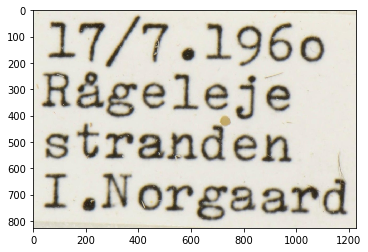

In [82]:
label = new.copy()
gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
th = gray.mean() - 5

mask = (gray>th)
background = label[mask]
new = label.copy()
kernel_size = 11
for row in tqdm(range(new.shape[0]//kernel_size + int(new.shape[0]%kernel_size > 0))):
    si = row*kernel_size
    ei = (row+1)*kernel_size
    ei = min(ei, new.shape[0])
    for col in range(new.shape[1]//kernel_size + int(new.shape[0]%kernel_size > 0)):
        sj = col*kernel_size
        ej = (col+1)*kernel_size
        ej = min(ej, new.shape[1])
        squ = new[si:ei,sj:ej]
        gray_squ = gray[si:ei,sj:ej]
        mask_squ = mask[si:ei,sj:ej]
        background_squ = squ[mask_squ]
        if len(background_squ):
            for i in range(squ.shape[0]):
                for j in range(squ.shape[1]):
                    if gray_squ[i,j] < th:
                        new[si+i,sj+j] = background_squ[np.random.randint(len(background_squ))]
        else:
            for i in range(squ.shape[0]):
                for j in range(squ.shape[1]):
                    if gray_squ[i,j] < th:
                        new[si+i,sj+j] = background[np.random.randint(len(background))]
                    
plt.figure()
plt.imshow(new)

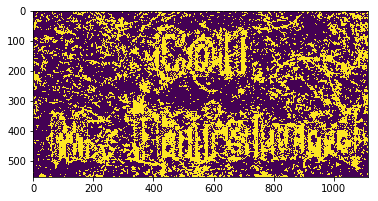

In [72]:

plt.imshow(b.reshape(gray.shape))

(array([   560.,   6091.,   9766.,  11590.,   9673.,   5831.,   5903.,
          4804.,   5137.,   6090.,   6737.,   5060.,   6329.,   5866.,
          5118.,   4719.,   3362.,   4302.,   4243.,   4203.,   3879.,
          3755.,   2666.,   3572.,   3714.,   3833.,   3949.,   3105.,
          4533.,   4253.,   4245.,   4352.,   4766.,   4284.,   6356.,
          8372.,  11210.,  14521.,  16328.,  31151.,  41987.,  54215.,
         72679.,  87488.,  50445.,  47130.,  72628., 250988., 305299.,
          6028.]),
 array([ 29.  ,  32.82,  36.64,  40.46,  44.28,  48.1 ,  51.92,  55.74,
         59.56,  63.38,  67.2 ,  71.02,  74.84,  78.66,  82.48,  86.3 ,
         90.12,  93.94,  97.76, 101.58, 105.4 , 109.22, 113.04, 116.86,
        120.68, 124.5 , 128.32, 132.14, 135.96, 139.78, 143.6 , 147.42,
        151.24, 155.06, 158.88, 162.7 , 166.52, 170.34, 174.16, 177.98,
        181.8 , 185.62, 189.44, 193.26, 197.08, 200.9 , 204.72, 208.54,
        212.36, 216.18, 220.  ]),
 <a list of 50 Pat

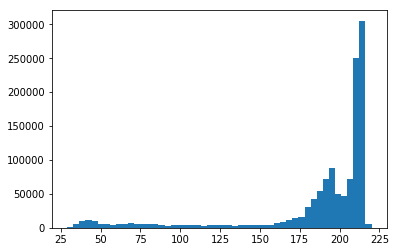

In [57]:
label = cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
plt.hist(gray.flatten(), bins=50)

In [44]:
new.shape, squ.shape, si, sj

((776, 1350, 3), (11, 6, 3), 770, 88)

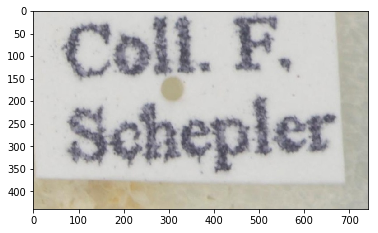

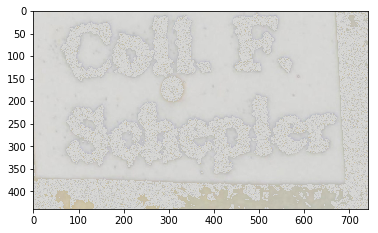

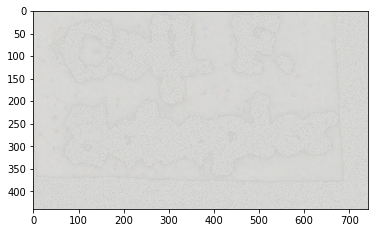

In [9]:
#Grayscale image,
#then make a threshold which is the mean of the grayscale image,
#take all the pixels that are below the threshold and replace them with random pixels from ones below the threshold
#repeat once, 
#fps = np.random.permutation(label_fps)
fp = fps[0]
label = cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB)
plt.imshow(label)
gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
th = gray.mean()
mask = (gray>th)
background = label[mask]
new = label.copy()
for i in range(new.shape[0]):
    for j in range(new.shape[1]):
        if gray[i,j] < th:
            new[i,j] = background[np.random.randint(len(background))]
plt.figure()
plt.imshow(new)

label = new.copy()
gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
th = gray.mean() - 5 
mask = (gray>th)
background = label[mask]
new = label.copy()
for i in range(new.shape[0]):
    for j in range(new.shape[1]):
        if gray[i,j] < th:
            new[i,j] = background[np.random.randint(len(background))]
plt.figure()
plt.imshow(new)

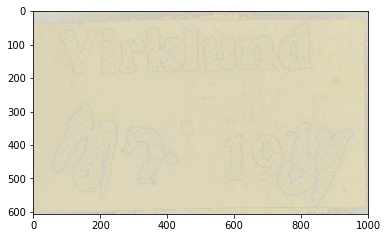

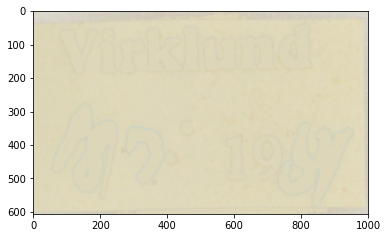

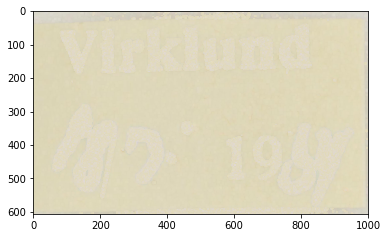

In [81]:
plt.figure()
plt.imshow(new)
kernel = np.ones((5,5), np.uint8)
erosion = np.zeros(new.shape)
for i in range(3):
    kernel[:] = np.median(new[:,:,i])
    erosion[:,:,i] = cv2.dilate(new[:,:,i],kernel,iterations = 1)
plt.figure()
plt.imshow(cv2.GaussianBlur(new, (15,15),2))
plt.figure()
plt.imshow(erosion.astype('uint8'))

In [47]:
background.shape

(490176, 3)

100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


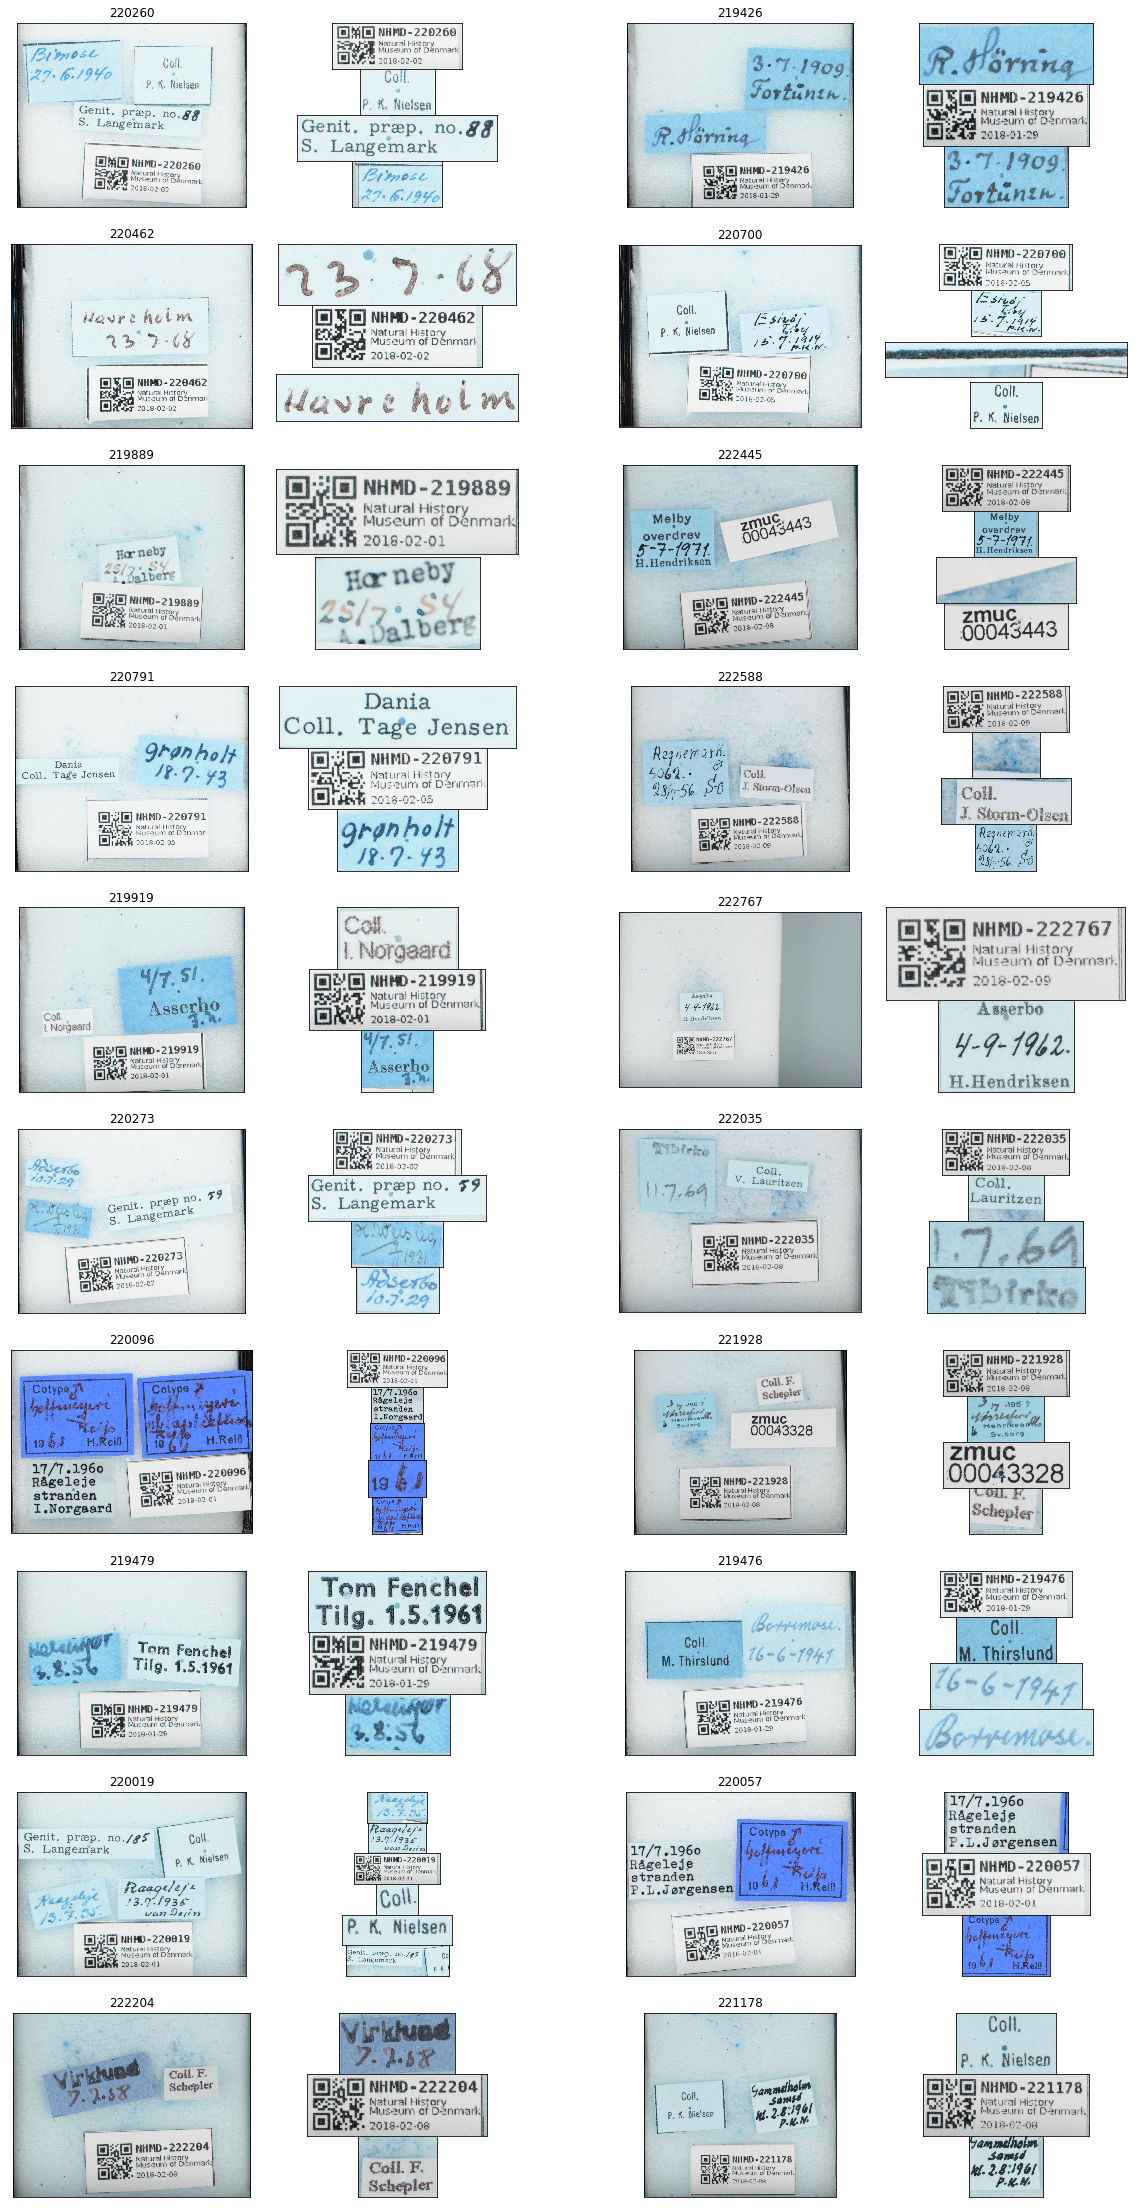

In [2]:
fig=plt.figure(figsize=(20, 40))
columns = 2
rows = 10
n_images = columns*rows


data = [(fp.split('/')[6],fp.split('Label')[1].split('.jpg')[0][:3]) for fp in label_fps]

fps = []
for catalog_no, img_no in data:
    fps += ['/home/rob/HWR/datasets/zooniverse/%s/Cropped%s.jpg'%(catalog_no, img_no)]


sample = np.random.permutation(fps)#[:300])

outer = gridspec.GridSpec(rows, columns, wspace=0.2, hspace=0.2)

for i in tqdm(range(n_images)):
    fp = sample[i]
    catalog_no = fp.split('/')[6]
    img_no = fp.split('Cropped')[1].split('.jpg')[0]
    label_glob = '/home/rob/HWR/datasets/zooniverse/' + catalog_no +  '/Label' + img_no + '[0-9].jpg'
    labels_fp =  glob(label_glob)
    n_labels = len(labels_fp)
    
    image = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    
    ax = plt.Subplot(fig, image[0])
    #t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
    #t.set_ha('center')
    ax.imshow(cv2.imread(fp))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(str(catalog_no))
    fig.add_subplot(ax)
    
    labels = gridspec.GridSpecFromSubplotSpec(n_labels,1,subplot_spec=image[1],wspace=0,hspace=0)
    
    for j in range(n_labels):
        ax = plt.Subplot(fig, labels[j])
        #t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
        #t.set_ha('center')
        ax.imshow(cv2.imread(labels_fp[j]))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()